In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
mob_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

mob_df.head(n=10)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2
5,7,9,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,4,4,4,4,4,3,4,4,2,4,4,4,6,1,6,1,3,2,5,2,6,3,3,2,1,2,2,2,3,6,1,2,2,1,3,1,1,5,5,3,6,4,5,5,5,6,4,4,4,2,2,3,4,4,0,0,0,1,1,1,2,8,1
6,8,11,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,4,5,1,4,2,1,4,2,4,4,4,2,2,1,4,1,3,3,3,1,1,1,6,1,1,1,2,2,2,1,1,6,1,4,3,3,3,3,2,1,2,3,1,3,1,2,2,3,2,2,2,2,2,1,3,1,0,0,0,0,1,1,2,8,2
7,9,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,5,5,2,4,2,4,4,2,4,4,2,4,4,4,6,1,1,4,2,1,1,1,6,2,2,1,1,1,1,1,2,5,1,1,1,1,2,4,2,1,3,3,1,3,3,2,4,4,2,4,4,2,4,1,4,1,0,0,0,1,1,1,2,11,2
8,10,6,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,4,6,2,4,3,3,4,2,4,4,4,4,2,3,5,2,4,6,3,3,1,1,5,1,4,2,3,3,3,2,3,5,2,4,3,4,5,4,3,3,4,3,3,3,4,2,3,6,4,2,3,3,2,1,6,2,1,0,0,0,0,1,2,10,1
9,11,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,3,6,2,4,4,4,4,3,4,4,4,4,4,4,3,2,4,3,5,3,1,3,5,3,3,3,2,2,3,2,2,5,2,2,3,2,2,3,2,2,3,2,3,2,5,2,3,5,4,4,2,2,3,3,5,2,1,0,0,0,0,1,2,9,2


In [2]:
########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [4]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [5]:
# scaling (normalizing) variables before correlation analysis
drop_lst = ['caseID','q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']
# dropping demographic information
mob_behavior = mob_df.drop(drop_lst,
                                      axis = 1)

# applying the unsupervised_scaler function
mob_scaled = unsupervised_scaler(df = mob_behavior)


# checking pre- and post-scaling variance
print(np.var(mob_behavior), '\n\n')
print(np.var(mob_scaled))

q4r1      0.212136
q4r2      0.154745
q4r3      0.248698
q4r4      0.195295
q4r5      0.179871
q4r6      0.151941
q4r7      0.248962
q4r8      0.249232
q4r9      0.227073
q4r10     0.072972
q4r11     0.017094
q11       1.041629
q12       1.801433
q13r1     0.768333
q13r2     1.538911
q13r3     1.019038
q13r4     1.393160
q13r5     1.150461
q13r6     0.644934
q13r7     0.915226
q13r8     0.983015
q13r9     1.360026
q13r10    1.393093
q13r11    1.140896
q13r12    1.584795
q24r1     2.370016
q24r2     0.917307
q24r3     1.972626
q24r4     2.457613
q24r5     2.089064
q24r6     1.096755
q24r7     1.214049
q24r8     1.079791
q24r9     2.602488
q24r10    1.191352
q24r11    1.634449
q24r12    1.062101
q25r1     1.251600
q25r2     1.494538
q25r3     1.175736
q25r4     1.214625
q25r5     1.364530
q25r6     2.392788
q25r7     1.108724
q25r8     1.536148
q25r9     1.247248
q25r10    1.296109
q25r11    1.364405
q25r12    1.770293
q26r18    2.269049
q26r3     1.338930
q26r4     1.980670
q26r5     1.

In [6]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 6,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(mob_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", mob_scaled.shape)
print("PCA shape     :", customer_pca.shape)

Original shape: (1552, 65)
PCA shape     : (1552, 6)


In [7]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.201
PC 2: 0.072
PC 3: 0.05
PC 4: 0.035
PC 5: 0.029
PC 6: 0.025


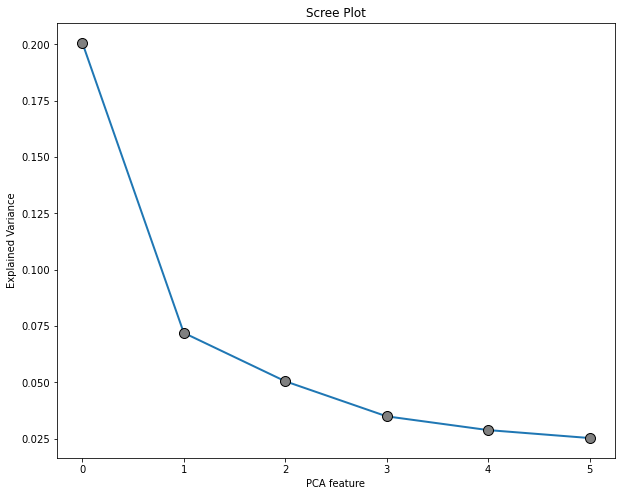

In [8]:
scree_plot(pca_object = pca,
           export     = False)

In [9]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(mob_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel('mobile_factor_loadings.xlsx')

           0     1     2     3     4     5
q4r1   -0.05 -0.07 -0.21  0.03 -0.19 -0.26
q4r2   -0.10  0.12 -0.18  0.06 -0.11 -0.07
q4r3   -0.09  0.03 -0.20 -0.03 -0.20 -0.09
q4r4   -0.10  0.11 -0.18  0.04 -0.12 -0.04
q4r5   -0.06 -0.06 -0.15 -0.15 -0.12 -0.15
q4r6   -0.05 -0.17 -0.19 -0.26  0.09 -0.19
q4r7   -0.07 -0.03 -0.19  0.08 -0.14 -0.07
q4r8   -0.09 -0.04 -0.21  0.03 -0.20 -0.04
q4r9   -0.07 -0.01 -0.24  0.15 -0.15 -0.14
q4r10   0.02 -0.03 -0.01  0.08 -0.04 -0.03
q4r11   0.05  0.04  0.16  0.13  0.03  0.18
q11    -0.04 -0.11 -0.21 -0.00 -0.23 -0.14
q12     0.07 -0.10  0.04 -0.14  0.12 -0.16
q13r1   0.08  0.08  0.10  0.34 -0.29  0.08
q13r2   0.12 -0.11  0.15 -0.02 -0.18 -0.08
q13r3   0.12 -0.25  0.05 -0.06 -0.20 -0.10
q13r4   0.09 -0.04  0.19 -0.01 -0.08  0.05
q13r5   0.12 -0.20  0.12 -0.04 -0.12 -0.02
q13r6   0.10 -0.02  0.11  0.06 -0.15 -0.04
q13r7   0.12 -0.26  0.09 -0.10 -0.16 -0.07
q13r8   0.12 -0.22  0.14 -0.10 -0.17 -0.07
q13r9   0.11 -0.19  0.05 -0.04 -0.16 -0.12
q13r10  0.0

In [10]:
# naming each principal component
factor_loadings_df.columns = ['Free App Users',
                             'Youth minded',
                             'Minimalists',
                             'Grown-ups',
                             '4',
                             '5']


# checking the result
factor_loadings_df

,Free App Users,Youth minded,Minimalists,Grown-ups,4,5
q4r1,-0.05,-0.07,-0.21,0.03,-0.19,-0.26
q4r2,-0.10,0.12,-0.18,0.06,-0.11,-0.07
q4r3,-0.09,0.03,-0.20,-0.03,-0.20,-0.09
q4r4,-0.10,0.11,-0.18,0.04,-0.12,-0.04
q4r5,-0.06,-0.06,-0.15,-0.15,-0.12,-0.15
q4r6,-0.05,-0.17,-0.19,-0.26,0.09,-0.19
q4r7,-0.07,-0.03,-0.19,0.08,-0.14,-0.07
q4r8,-0.09,-0.04,-0.21,0.03,-0.20,-0.04
q4r9,-0.07,-0.01,-0.24,0.15,-0.15,-0.14
q4r10,0.02,-0.03,-0.01,0.08,-0.04,-0.03


In [11]:
# converting into a DataFrame 
customer_pca = pd.DataFrame(customer_pca)


# renaming columns
customer_pca.columns = factor_loadings_df.columns


# checking results
customer_pca

,Free App Users,Youth minded,Minimalists,Grown-ups,4,5
0,7.736791,1.660724,0.882856,-1.770436,-0.538922,2.432476
1,-5.459296,3.667467,1.164444,1.402898,0.783607,-0.641784
2,6.567941,1.446702,0.255962,-1.817795,2.118520,-0.312110
3,-1.792437,0.160375,3.675767,-1.370043,0.263233,-0.832091
4,-0.397589,3.047960,1.740292,0.938071,0.609990,0.445976
...,...,...,...,...,...,...
1547,-3.854339,-0.685403,0.771202,-0.428548,-0.839007,-0.513785
1548,-2.008201,-2.197149,-0.159605,-1.951446,-2.635699,1.781194
1549,-5.680285,2.981163,-2.373674,1.418893,0.300413,-1.332710
1550,-2.315977,-1.156688,-1.040511,-1.323934,-1.305796,-0.077276


In [12]:
for val in mob_scaled:
    print(f" '{val}',")

 'q4r1',
 'q4r2',
 'q4r3',
 'q4r4',
 'q4r5',
 'q4r6',
 'q4r7',
 'q4r8',
 'q4r9',
 'q4r10',
 'q4r11',
 'q11',
 'q12',
 'q13r1',
 'q13r2',
 'q13r3',
 'q13r4',
 'q13r5',
 'q13r6',
 'q13r7',
 'q13r8',
 'q13r9',
 'q13r10',
 'q13r11',
 'q13r12',
 'q24r1',
 'q24r2',
 'q24r3',
 'q24r4',
 'q24r5',
 'q24r6',
 'q24r7',
 'q24r8',
 'q24r9',
 'q24r10',
 'q24r11',
 'q24r12',
 'q25r1',
 'q25r2',
 'q25r3',
 'q25r4',
 'q25r5',
 'q25r6',
 'q25r7',
 'q25r8',
 'q25r9',
 'q25r10',
 'q25r11',
 'q25r12',
 'q26r18',
 'q26r3',
 'q26r4',
 'q26r5',
 'q26r6',
 'q26r7',
 'q26r8',
 'q26r9',
 'q26r10',
 'q26r11',
 'q26r12',
 'q26r13',
 'q26r14',
 'q26r15',
 'q26r16',
 'q26r17',


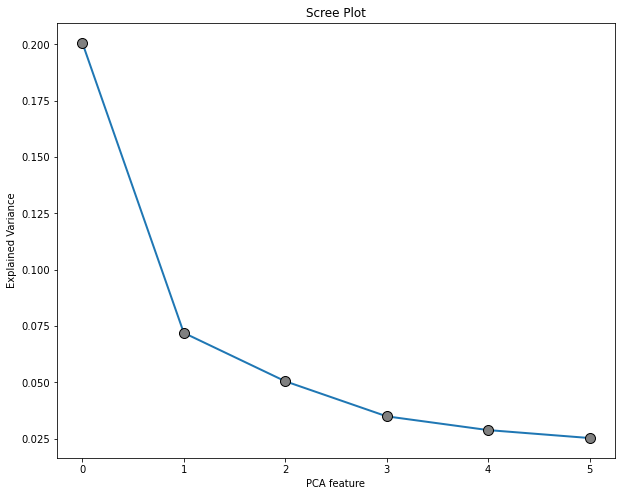

In [13]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 6,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(mob_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

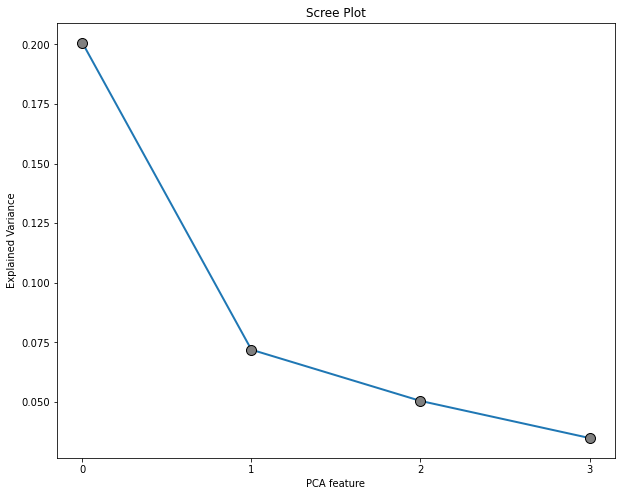

In [14]:
# INSTANTIATING a new model using the first three principal components
pca_4 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_4 = pca_4.fit_transform(mob_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_4)

In [15]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(mob_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_4 = pd.DataFrame(np.transpose(pca_4.components_))


# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(mob_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_4.round(2)}
""")


MAX Components Factor Loadings
------------------------------
           0     1     2     3     4     5
q4r1   -0.05 -0.07 -0.21  0.03 -0.19 -0.26
q4r2   -0.10  0.12 -0.18  0.06 -0.11 -0.07
q4r3   -0.09  0.03 -0.20 -0.03 -0.20 -0.09
q4r4   -0.10  0.11 -0.18  0.04 -0.12 -0.04
q4r5   -0.06 -0.06 -0.15 -0.15 -0.12 -0.15
q4r6   -0.05 -0.17 -0.19 -0.26  0.09 -0.19
q4r7   -0.07 -0.03 -0.19  0.08 -0.14 -0.07
q4r8   -0.09 -0.04 -0.21  0.03 -0.20 -0.04
q4r9   -0.07 -0.01 -0.24  0.15 -0.15 -0.14
q4r10   0.02 -0.03 -0.01  0.08 -0.04 -0.03
q4r11   0.05  0.04  0.16  0.13  0.03  0.18
q11    -0.04 -0.11 -0.21 -0.00 -0.23 -0.14
q12     0.07 -0.10  0.04 -0.14  0.12 -0.16
q13r1   0.08  0.08  0.10  0.34 -0.29  0.08
q13r2   0.12 -0.11  0.15 -0.02 -0.18 -0.08
q13r3   0.12 -0.25  0.05 -0.06 -0.20 -0.10
q13r4   0.09 -0.04  0.19 -0.01 -0.08  0.05
q13r5   0.12 -0.20  0.12 -0.04 -0.12 -0.02
q13r6   0.10 -0.02  0.11  0.06 -0.15 -0.04
q13r7   0.12 -0.26  0.09 -0.10 -0.16 -0.07
q13r8   0.12 -0.22  0.14 -0.10 -0.

In [16]:
# naming each principal component
factor_loadings_4.columns = ['Free App Users',   # avoids Vegan, Vege, and Indian
                           'Youth minded',       # avoids Med, ME, and Wine
                           'Minimalists',
                           'Grown-ups'] # Med, no Wine


# checking the result
factor_loadings_4.round(decimals = 2)

,Free App Users,Youth minded,Minimalists,Grown-ups
q4r1,-0.05,-0.07,-0.21,0.03
q4r2,-0.10,0.12,-0.18,0.06
q4r3,-0.09,0.03,-0.20,-0.03
q4r4,-0.10,0.11,-0.18,0.04
q4r5,-0.06,-0.06,-0.15,-0.15
q4r6,-0.05,-0.17,-0.19,-0.26
q4r7,-0.07,-0.03,-0.19,0.08
q4r8,-0.09,-0.04,-0.21,0.03
q4r9,-0.07,-0.01,-0.24,0.15
q4r10,0.02,-0.03,-0.01,0.07


In [17]:
# analyzing factor strengths per customer
factor_loadings = pca_4.transform(mob_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_4.columns


# checking the results
factor_loadings_df

,Free App Users,Youth minded,Minimalists,Grown-ups
0,7.736791,1.660721,0.882731,-1.769399
1,-5.459296,3.667470,1.164456,1.402161
2,6.567941,1.446697,0.255883,-1.817148
3,-1.792437,0.160367,3.675508,-1.367759
4,-0.397589,3.047967,1.740264,0.938562
...,...,...,...,...
1547,-3.854339,-0.685403,0.771308,-0.428202
1548,-2.008201,-2.197159,-0.159787,-1.949885
1549,-5.680285,2.981162,-2.373638,1.418641
1550,-2.315977,-1.156690,-1.040495,-1.322720


In [18]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Free App Users    13.046183
Youth minded       4.674587
Minimalists        3.278061
Grown-ups          2.265882
dtype: float64

In [19]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

Free App Users    13.046183
Youth minded       4.674587
Minimalists        3.278061
Grown-ups          2.265882
dtype: float64 


Free App Users    1.0
Youth minded      1.0
Minimalists       1.0
Grown-ups         1.0
dtype: float64


# Agglomerative Clustering

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

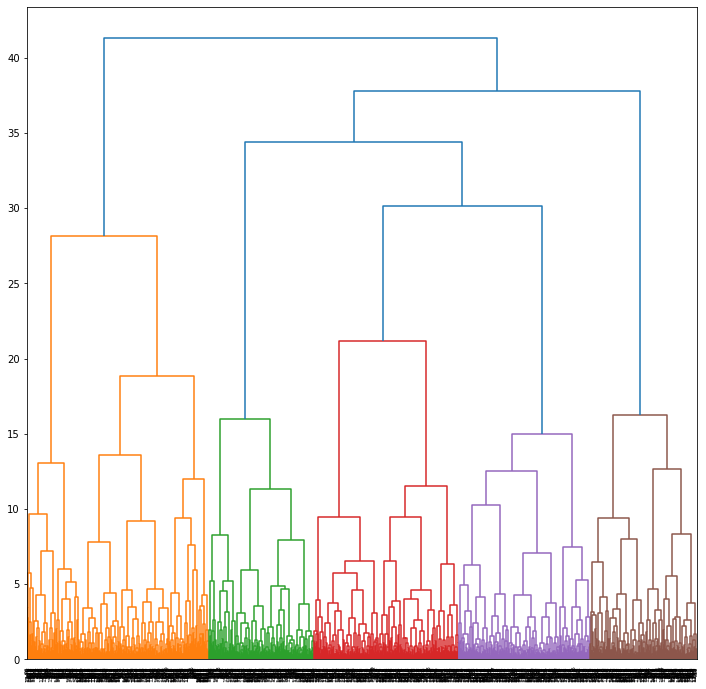

In [21]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [22]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

3    457
1    330
0    321
2    241
4    203
Name: Cluster, dtype: int64


In [23]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Free App Users',   # avoids Vegan, Vege, and Indian
                           'Youth minded',       # avoids Med, ME, and Wine
                           'Minimalists',
                           'Grown-ups']


# checking results (c lusters = rows, pc = columns)
centroids_pca_df.round(2)

,Free App Users,Youth minded,Minimalists,Grown-ups
0,0.87,0.44,-0.08,-0.89
1,-0.57,-0.37,1.03,-0.52
2,-1.05,1.36,-0.44,0.37
3,-0.04,-0.80,-0.73,0.15
4,0.89,0.09,0.61,1.47


In [24]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          factor_loadings_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([mob_df.loc[ : , ['caseID','q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4',
                                                       'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10',
                                                       'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4',
                                                       'q50r5', 'q54', 'q55', 'q56', 'q57']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = [
'caseID',
'Age',
'dev_Iphone',
'dev_ipod',
'dev_Android',
'dev_BB',
'dev_Nokia',
'dev_windows',
'dev_hp',
'dev_tablet',
'dev_other',
'dev_none',
'education',
'marital_status',
'no_child',
'childu6',
'child6_12',
'child13_17',
'child18more',
'race',
'hispanic',
'salary',
'sex',
                              'Cluster',
                              'Free App Users',   # avoids Vegan, Vege, and Indian
                              'Youth minded',       # avoids Med, ME, and Wine
                              'Minimalists',
                              'Grown-ups']


# checking the results
print(final_pca_clust_df.head(n = 5))

   caseID  Age  dev_Iphone  dev_ipod  dev_Android  dev_BB  dev_Nokia  dev_windows  dev_hp  dev_tablet  dev_other  dev_none  education  marital_status  no_child  childu6  child6_12  child13_17  child18more  race  hispanic  salary  sex  Cluster  Free App Users  Youth minded  Minimalists  Grown-ups
0       1   10           0         0            1       0          0            0       0           0          0         0          3               4         1        0          0           0            0     2         2       5    1        0            7.74          1.66         0.88      -1.77
1       2    5           0         0            1       0          0            0       0           0          0         0          5               1         0        1          1           0            0     3         2      10    2        2           -5.46          3.67         1.16       1.40
2       3    7           0         0            0       0          1            0       0           0        

In [25]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

age_names = {     1: 'Under 18',
                  2: '18-24',
                  3: '25-29',
                  4: '30-34',
                  5: '35-39',
                  6: '40-44',
                  7: '45-49',
                  8: '50-54',
                  9: '55-59',
                  10:'60-64',
                  11:'65+' }

final_pca_clust_df['Age'].replace(age_names, inplace = True)


marritalstatus_names = {  1: 'Married',
                          2: 'Single',
                          3: 'Sgl w Part',
                          4: 'separated'}

final_pca_clust_df['marital_status'].replace(marritalstatus_names, inplace = True)

race_names = {            1: 'white',
                          2: 'black',
                          3: 'asian',
                          4: 'NHOPI',
                          5: 'AIAN',
                          6: 'OR'}

final_pca_clust_df['race'].replace(race_names, inplace = True)

salary_names = {1: 'Under $10K',
                2: '$10k-$14.9K',
                3: '$15k-$19.9K',
                4: '$20k-$29.9K',
                5: '$30k-$399.K',
                6: '$40k-$49.9K',
                7: '$50k-$59.9K',
                8: '$60k-$69.9K',
                9: '$70k-$79.9K',
                10: '$80k-$89.9K',
                11: '$90k-$99.9K',
                12: '$100k-$124.9K',
                13: '$125k-$149.9K',
                14: '$150k and over'
                }

final_pca_clust_df['salary'].replace(salary_names, inplace = True)

sex_names = {            1: 'Male',
                          2: 'Female'}

final_pca_clust_df['sex'].replace(sex_names, inplace = True)

hispanic_names = {            1: 'Yes',
                          2: 'No'}

final_pca_clust_df['hispanic'].replace(hispanic_names, inplace = True)

# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,caseID,Age,dev_Iphone,dev_ipod,dev_Android,dev_BB,dev_Nokia,dev_windows,dev_hp,dev_tablet,dev_other,dev_none,education,marital_status,no_child,childu6,child6_12,child13_17,child18more,race,hispanic,salary,sex,Cluster,Free App Users,Youth minded,Minimalists,Grown-ups
0,1,60-64,0,0,1,0,0,0,0,0,0,0,3,separated,1,0,0,0,0,black,No,$30k-$399.K,Male,Cluster 1,7.74,1.66,0.88,-1.77
1,2,35-39,0,0,1,0,0,0,0,0,0,0,5,Married,0,1,1,0,0,asian,No,$80k-$89.9K,Female,Cluster 3,-5.46,3.67,1.16,1.40
2,3,45-49,0,0,0,0,1,0,0,0,0,0,4,separated,0,0,0,1,0,black,No,$40k-$49.9K,Male,Cluster 1,6.57,1.45,0.26,-1.82
3,4,45-49,1,1,0,0,0,0,0,0,0,0,2,Married,0,1,1,0,0,white,No,$30k-$399.K,Male,Cluster 2,-1.79,0.16,3.68,-1.37
4,6,18-24,1,0,0,0,0,0,0,0,0,0,5,Single,1,0,0,0,0,asian,No,$20k-$29.9K,Female,Cluster 3,-0.40,3.05,1.74,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2392,18-24,1,1,0,0,0,0,0,0,0,0,2,Single,0,1,0,0,0,OR,Yes,Under $10K,Male,Cluster 2,-3.85,-0.69,0.77,-0.43
1548,2393,30-34,1,1,0,0,0,0,0,1,0,0,3,Married,0,1,1,0,0,white,No,$70k-$79.9K,Female,Cluster 2,-2.01,-2.20,-0.16,-1.95
1549,2394,25-29,1,1,0,1,0,0,0,1,0,0,4,Single,0,0,1,1,0,white,No,$100k-$124.9K,Female,Cluster 3,-5.68,2.98,-2.37,1.42
1550,2395,18-24,1,0,1,0,0,0,0,0,0,0,2,Single,1,0,0,0,0,OR,Yes,$50k-$59.9K,Male,Cluster 4,-2.32,-1.16,-1.04,-1.32


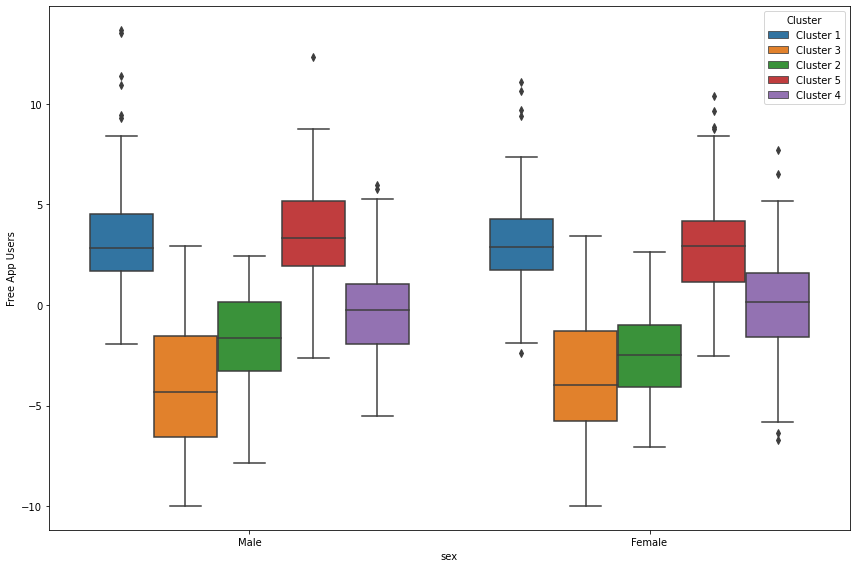

In [26]:
########################
# Channel
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'sex',
            y = 'Free App Users',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

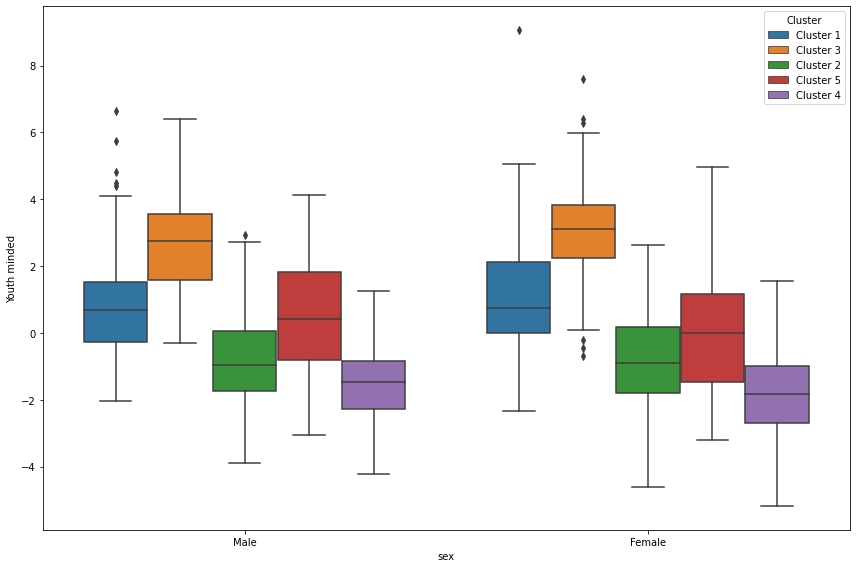

In [27]:
########################
# Channel
########################

# Veggie Inclusives
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'sex',
            y    = 'Youth minded',
            hue  = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

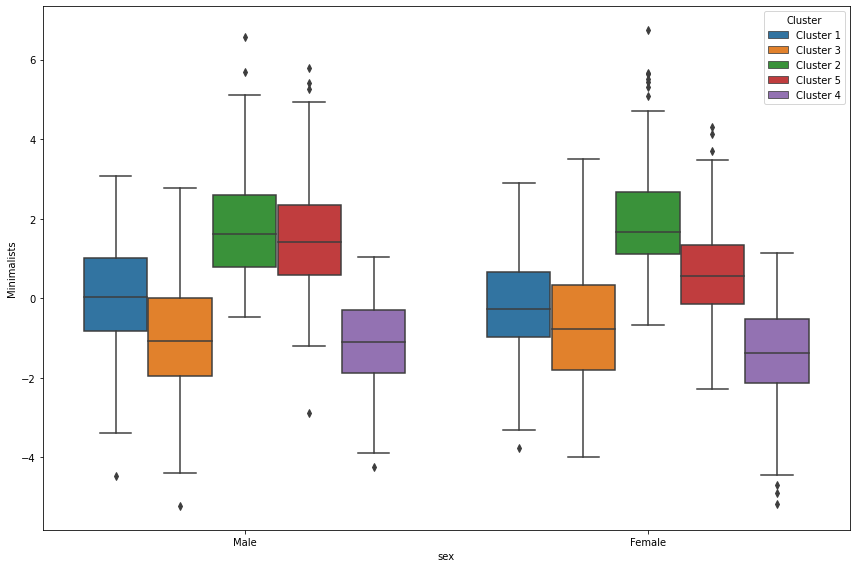

In [28]:
########################
# Channel
########################

# Mediterranean Non-Drinkers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'sex',
            y = 'Minimalists',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

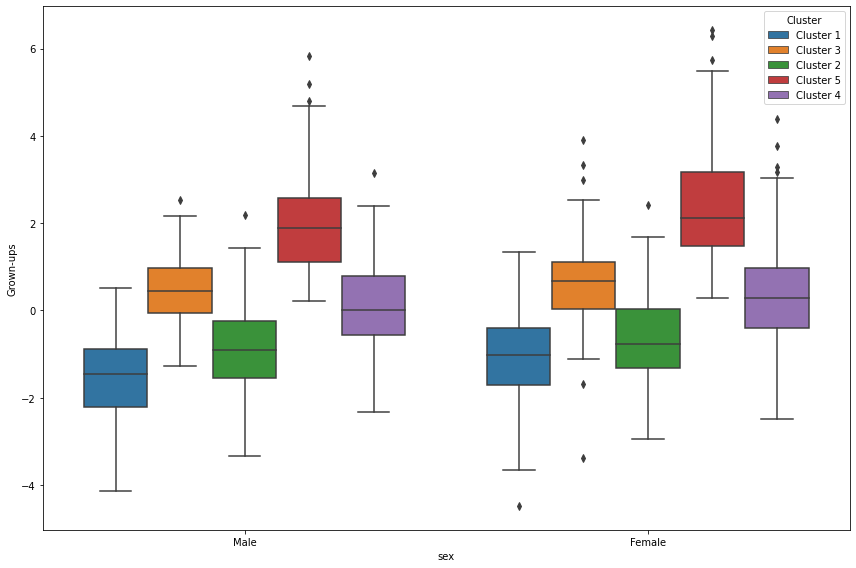

In [29]:
########################
# Region
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'sex',
            y    = 'Grown-ups',
            hue  = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

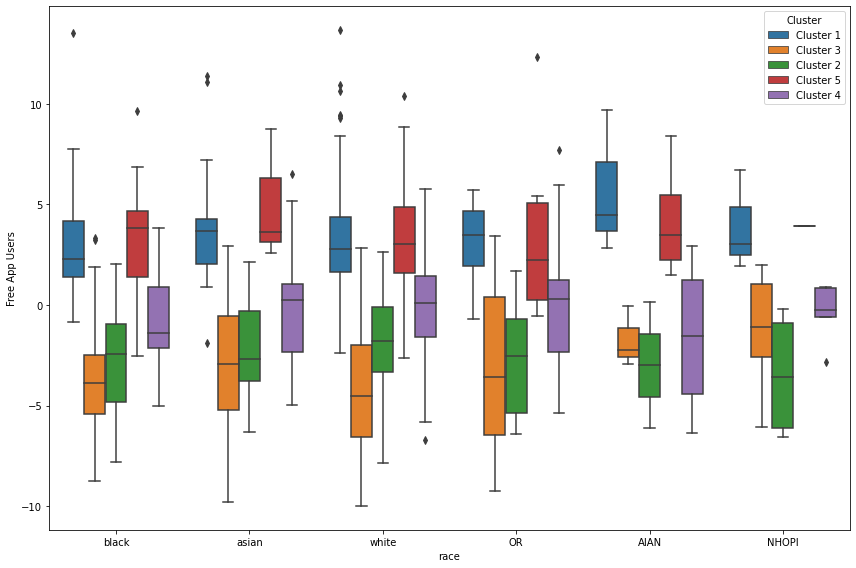

In [30]:
########################
# Channel
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'race',
            y = 'Free App Users',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

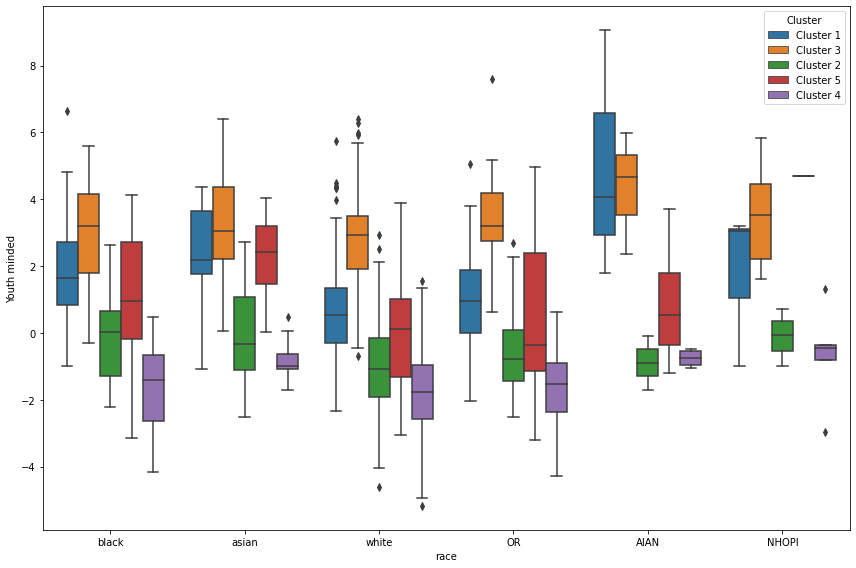

In [31]:
########################
# Channel
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'race',
            y = 'Youth minded',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

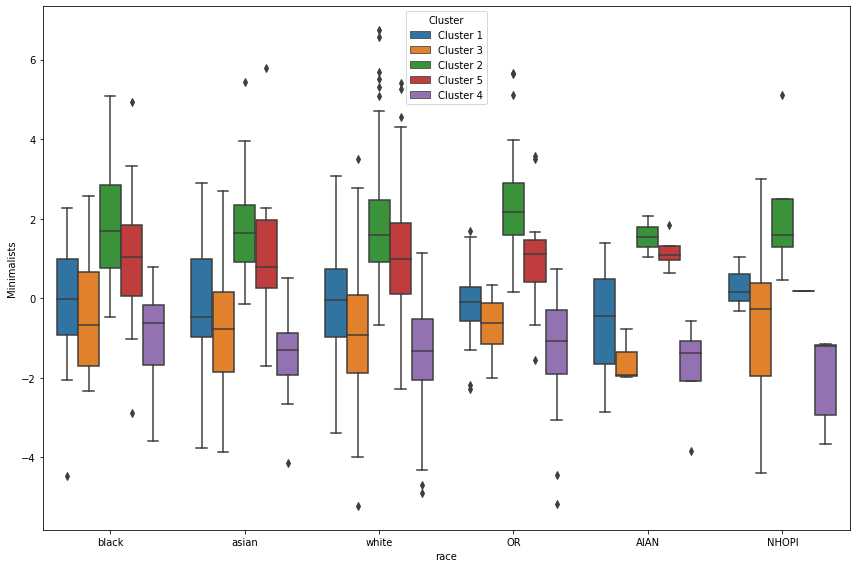

In [32]:
########################
# Channel
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'race',
            y = 'Minimalists',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

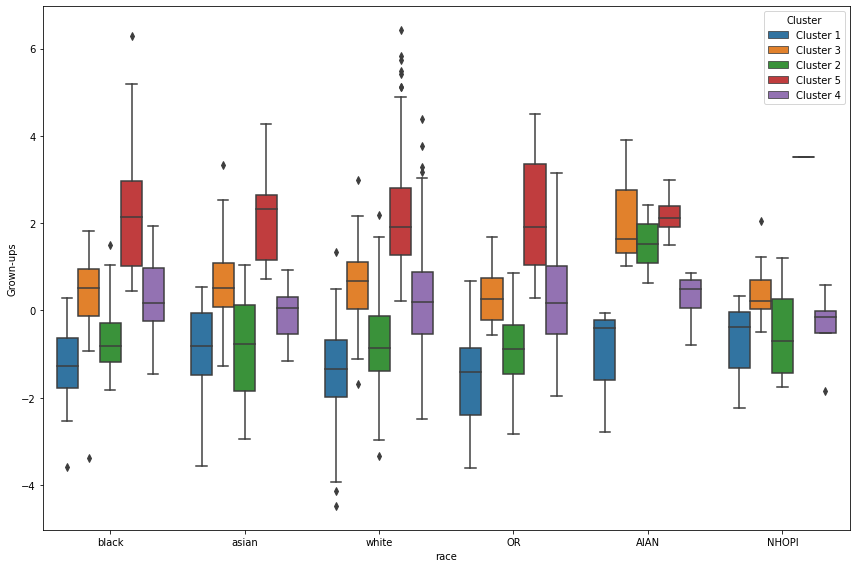

In [33]:
########################
# Channel
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'race',
            y = 'Grown-ups',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()